In [23]:
import os

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from scipy.stats import mannwhitneyu
from scipy import stats

from yaml import Loader, load


from argparse     import ArgumentParser
from scipy import sparse
import bioframe as bf

from matplotlib import pyplot as plt

import anndata as ad
import scanpy as sc
import muon as mu

from cutag.parsers.cellranger import load_cellranger, load_ADTs
from cutag.utilities.clustering import wanted_leiden
from cutag.stats.metrics import ragi_score
import seaborn as sns

from collections import OrderedDict

## Files

In [24]:
results_path = rdir = "/scratch2/shared/CUTAG/results21"

## Samples

In [36]:
samples_dict = {'GSM5849227':  'PBMC H3K27me3, Satija et al.',
           'GSM5849218':  'PBMC H3K9me3, Satija et al.',
           'GSM5849221':  'PBMC H3K27ac rep1, Satija et al.',
           'GSM5849224':  'PBMC H3K27ac rep2, Satija et al.',
           'GSM5849215':  'PBMC H3K4me3, Satija et al.',
           'GSM5849212':  'PBMC H3K4me2, Satija et al.',
           'GSM5849206':  'PBMC H3K4me1 rep1, Satija et al.',
           'GSM5849209':  'PBMC H3K4me1 rep2, Satija et al.',
           'GSM4732109':  'ASAP'}

sample_cite = {'GSM5008737':  'CITE'}

## Figures

### Figure 1

Processing GSM5849227
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849228/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849218
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849219/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849221
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849222/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849224
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849225/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849215
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849216/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849212
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849213/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849206
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849207/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849209
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849210/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/home/xavi/.miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_counts'] = number
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dt

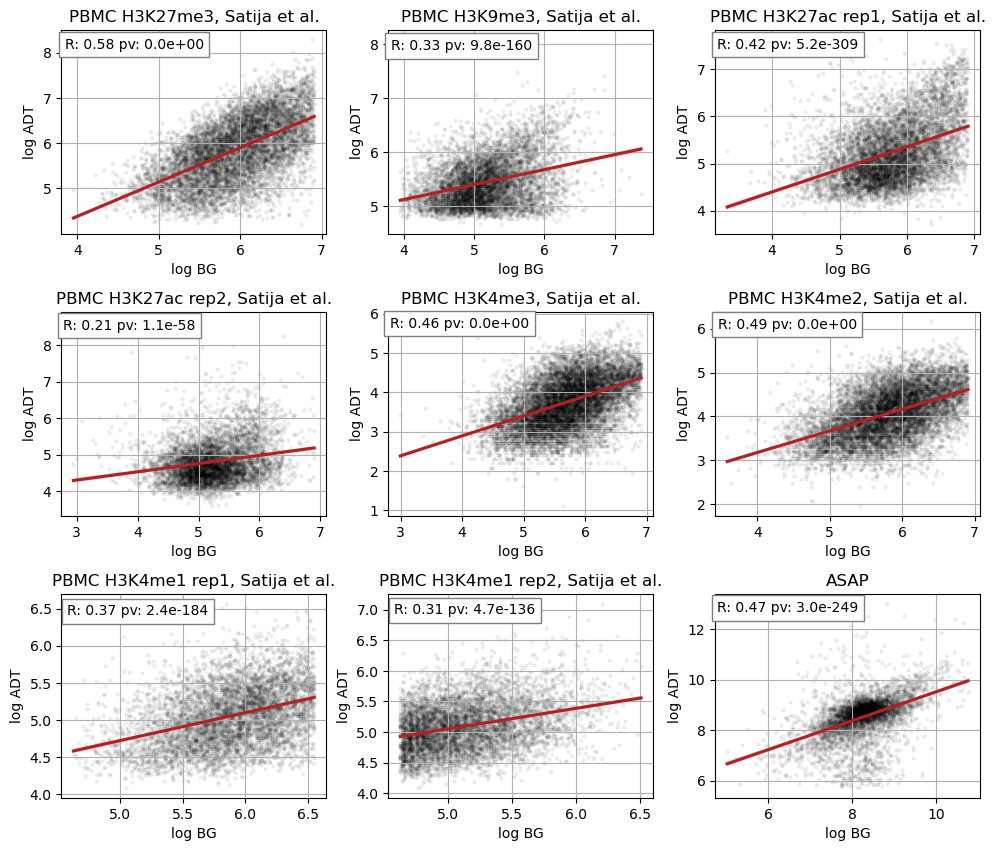

In [38]:
plt.figure(figsize=(10, 11))
ax = None

for nplot, sample in enumerate(list(samples_dict.keys()),1):
    
    sampleID = sample
    
    try:
        samples = load(open("/scratch2/shared/CUTAG/data/samples.yml"), Loader)[sampleID]
    except KeyError:
        raise Exception(f'ERROR: {sampleID} not in sample YAML file')

    dpath = os.path.join('/scratch2/shared/CUTAG/data/', samples["modality"])

    genomic_sample = os.path.join(dpath, sampleID)


    adt_sampleID   = samples['ADT']
    adt_sample     = os.path.join(dpath, adt_sampleID)
    outdir         = "/scratch2/shared/CUTAG/resultstry/"+sampleID
    
    regress_count  = "bg"
    feature_type   = "merged_as_satija"
    n_neighbors    = 1
    
    seed           = None
    
    min_cells      = samples['optimal params']['min_cells']
    min_genes      = samples['optimal params']['min_genes']
    max_genes      = samples['optimal params']['max_genes']
    min_counts     = samples['optimal params']['min_counts']
    max_counts     = samples['optimal params']['max_counts']
    
    min_genes_adt  = samples['optimal params']['min_genes_adt']
    min_counts_adt = samples['optimal params']['min_counts_adt']
    max_counts_adt = samples['optimal params']['max_counts_adt']
    
    if samples["modality"]=="ASAP":
        
        genomic_sample = '/scratch2/shared/CUTAG/data/ASAP/GSM4732109'

        adata = load_cellranger(genomic_sample, feature_type=feature_type, 
                                      dtype=float)

        adt_sample = '/scratch2/shared/CUTAG/data/ASAP/GSM4732110'
        adts_file = os.path.join(adt_sample, "ADTs", "ADT_matrix.tsv")

        df_adts = pd.read_csv(adts_file, sep=' ')
        df_adts=df_adts.set_index("barcode")

        adts = ad.AnnData(X=df_adts.to_numpy().T, obs=df_adts.columns.tolist(), var=df_adts.index.tolist(), dtype='float64')
        adts.var_names = df_adts.index.tolist()
        adts.obs_names = df_adts.columns.tolist()

        del(adts.obs[0])
        del(adts.var[0])

        adata = adata[adata.obs_names.isin(adts.obs_names)]

        sc.pp.filter_cells(adata, min_counts = 0)

        adata.obs["genomic_counts"] = adata.obs["n_counts"]

        sc.pp.filter_cells(adts, min_counts = 0)

        adts.obs["adt_counts"] = adts.obs["n_counts"]
                
        process_line = lambda barcode, bg_count: (barcode, int(bg_count)) 
        bgpath = os.path.join(genomic_sample, "outs", "mapped_read_per_barcode.txt")
        bg_dict = dict(process_line(*l.split()) for l in open(bgpath, "r"))

        combined_df = pd.merge(adata.obs, adts.obs, how='inner', left_index=True, right_index=True)
        
        combined_df["bg_counts"] = combined_df.index.map(bg_dict)

        x = np.log1p(combined_df["adt_counts"])
        y = np.log1p(combined_df["bg_counts"])    
    
    else:
        if samples["modality"] == "CITE":
            max_mito = samples['optimal params']['max_mito']
            min_n_genes = samples['optimal params']['min_n_genes']
            max_n_genes = samples['optimal params']['max_n_genes']    


        print(f"Processing {sampleID}")

        # Load data
        ### remove windows with less than five counts and then merge adjacent windows
        print(f" - Loading Genomic library")

        if samples["modality"] == "CITE":
            adata = sc.read(os.path.join(genomic_sample, "CITE_rna.h5ad"))
        else:
            adata = load_cellranger(genomic_sample, feature_type=feature_type, 
                                  dtype=float)


        adata.obs["total_genomic"] = np.array(adata.X.sum(axis=1)).flatten()

        # Filter bins in few cells
        print(f" - Filter genomic features in few cells")
        ###########################################################################
        # Filter Histones


        # Cell barcodes with <1000 or >60000 UMIs
        if min_counts:
            sc.pp.filter_cells(adata, min_counts=min_counts)

        if max_counts:
            sc.pp.filter_cells(adata, max_counts=max_counts)

        # # <50 or >700 genes detected
        if min_genes:
            sc.pp.filter_cells(adata, min_genes=min_genes)

        if max_genes:
            sc.pp.filter_cells(adata, max_genes=max_genes)

        # removing genes expressed in fewer than 3 cells
        if min_cells:
            sc.pp.filter_genes(adata, min_cells=min_cells)

        if samples["modality"] == "CITE":

            adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
            sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
            adata = adata[adata.obs.pct_counts_mt < max_mito, :]
            adata = adata[adata.obs.n_genes_by_counts > min_n_genes, :]
            adata = adata[adata.obs.n_genes_by_counts < max_n_genes, :]

        ###########################################################################
        # Merge ADTS
        print(f" - Loading ADTs")
        print(os.path.join(adt_sample, "ADTs", "ADT_matrix.tsv"))
        adts_file = os.path.join(adt_sample, "ADTs", "ADT_matrix.tsv")
        # TODO: what is this?
        if sampleID.startswith("GSM"):
            ad_adts = load_ADTs(adts_file, adata, modality= samples["modality"], transpose=True)
        else:
            ad_adts = load_ADTs(adts_file, adata, modality= samples["modality"])

        ###########################################################################
        # Filter ADTs
        print(f" - Filter ADTs with few counts")
        if samples["modality"] != "ASAP":
            if min_genes_adt:
                sc.pp.filter_cells(ad_adts, min_genes=min_genes_adt)

            if min_counts_adt:
                sc.pp.filter_cells(ad_adts, min_counts=min_counts_adt)
                sc.pp.filter_genes(ad_adts, min_counts=min_counts_adt)  # we want to make sure there is at least few counts for a given ADT


            if max_counts_adt:
                sc.pp.filter_cells(ad_adts, max_counts=max_counts_adt)

            # WARNING: highly specific to Satija dataset:
            if samples["lab"]=="Satija":
                ad_adts.obs.index = [f"{v[:-2]}-1" for v in ad_adts.obs.index]

        ###########################################################################
        # Merge ADT with genomic library
        merged_df = pd.merge(ad_adts.obs, adata.obs, how="inner",
                               left_index=True, right_index=True)
        
        ###########################################################################
        # Normalize each cell ADT count by the genomic-library background
        if regress_count != "no":
            if regress_count == "bg":
                if samples["modality"] == "CITE":
                    merged_df["bg_counts"] = merged_df["total_counts"]
                else:
                    process_line = lambda barcode, bg_count: (barcode, int(bg_count)) 
                    bgpath = os.path.join(genomic_sample, "outs", "mapped_read_per_barcode.txt")
                    bg_dict = dict(process_line(*l.split()) for l in open(bgpath, "r"))
                    merged_df["bg_counts"] = merged_df.index.map(bg_dict)
            elif regress_count == "total":
                merged_df["bg_counts"] = merged_df["total_genomic"]
            else:
                raise NotImplementedError(
                    f"ERROR: regression {regress_count} not implemented")
            print(f" - Normalize ADTs by genomic background")
            # Load the data
            ad_adts=ad_adts[ad_adts.obs_names.isin(merged_df.index.tolist())]
            x = np.log1p(np.sum(ad_adts.X, axis=1))
            y = np.log1p(merged_df["bg_counts"])
    
    ax = plt.subplot(4, 3, nplot)
    sns.regplot(x=x, y=y, scatter_kws={'s': 5, 'color': 'k', 'alpha': 0.05}, color='firebrick')
    r, pv = stats.pearsonr(x, y)
    i = plt.xlim()[0]
    j = plt.ylim()[1]
    t = plt.text(i * 1.01, j * 0.98, f'R: {r:.2f} pv: {pv:.1e}', va='top')
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='tab:grey'))
    plt.xlabel('log BG')
    plt.ylabel('log ADT')
    plt.grid()
    plt.title(samples_dict[sample])

# Show the plot
plt.tight_layout()
plt.savefig("fig1.png", dpi=500)
plt.show()

### Figure 3

GSM5849215
GSM5849212
GSM5849221
GSM5849224
GSM5849206
GSM5849209
GSM5849218
GSM5849227


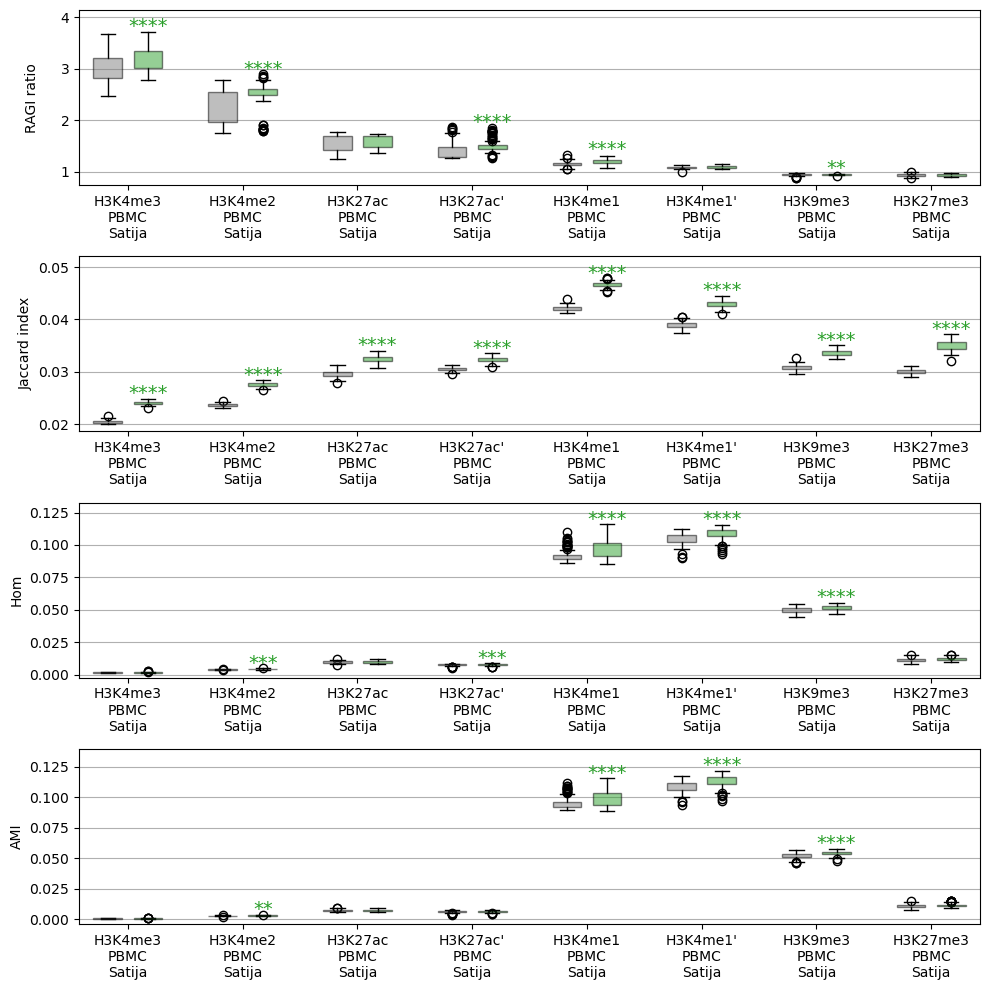

In [39]:
samples = load(open("/scratch2/shared/CUTAG/data/samples.yml"), Loader)

def get_results(sampleID, results_path):
    rpath = os.path.join(results_path, sampleID) # bsc symp was results4
    results = {}
    prev_vals = set()  # some combination of parameters yield the exact same clustering
    failed=list()
    for rep in os.listdir(rpath):
        key = tuple(rep.split('_'))
        dpath = os.path.join(rpath, rep)
        sampleID = key[1]
        leiden = int(key[0][6:])

        results[key] = {}
        results[key]['path']        = dpath
        results[key]['sampleID']    = sampleID
        results[key]['min_genes']   = int(key[3][9:])
        results[key]['max_genes']   = int(key[4][9:])
        results[key]['min_counts']  = int(key[5][10:])
        results[key]['max_counts']  = int(key[6][10:])
        #results[key]['rm_pca']      = int(key[7][3:])
        results[key]['n_pcs']       = int(key[8][4:])
        results[key]['n_neighbors'] = float(key[9][6:])
        results[key]['regress']     = key[10][8:]
        
        # general stats
        try:
            for line in open(os.path.join(dpath, f'{sampleID}_stats.tsv')):
                try:
                    k, v = line.strip().split('\t')
                    results[key][k] = float(v)
                except ValueError:
                    k, *v = line.strip().split('\t')
                    results[key][k] = [float(i) for i in v]
        except FileNotFoundError:
            del results[key]
            continue
        results[key]['RAGI HK'] = results[key]['RAGI housekeeping genes']
        results[key]['RAGI marker'] = results[key]['RAGI ratio'] * results[key]['RAGI HK']

    filtered_keys = [key for key in results.keys() if "RAGI ratio" in results[key]]
    results = {key: results[key] for key in filtered_keys}
    
    return results

#rdir = '/scratch2/shared/CUTAG/results21'

samples.keys()

del samples['621']
del samples['946']
del samples['1019']
del samples['GSM4732109']
del samples['GSM5008737']
del samples['GSM5008740']

# Create a list of keys in the desired order
key_order = ['GSM5849215', 'GSM5849212', 'GSM5849221', 'GSM5849224', 'GSM5849206', 'GSM5849209', 'GSM5849218', 'GSM5849227']

# Create a new OrderedDict with the keys in the desired order
samples = OrderedDict((key, samples[key]) for key in key_order)

results = {}
for s_key,s_vals in samples.items():
    print(s_key)
    s_name = f"{s_vals['mark']}-rep{s_vals['replicate']}_{s_vals['tissue']}_{s_vals['lab']}"
    try:
        results[s_key] = get_results(s_key, rdir)
        results[s_key]['name'] = s_name
    except FileNotFoundError:
        print('  -> MISSING')

stats = ['RAGI ratio','JAC2','Homogeneity score', 'AMI']

plt.figure(figsize=(10, 10))

for nstat, stat in enumerate(stats, 1):
    plt.subplot(len(stats), 1, nstat)
    if stat.startswith("JAC"):
        plt.ylabel("Jaccard index")
    elif stat.startswith("RAGI"):
        plt.ylabel("RAGI ratio\n")
        
    elif stat.startswith("Homogeneity"):
        plt.ylabel("Hom")                
    else:
        plt.ylabel(stat)        
    bgs = []
    nos = []
    max_pos = []
    min_pos = []
    texts = []
    for pos, (s_key, s_vals) in enumerate(results.items()):
        
        no = [s_vals[k][stat] for k in s_vals
              if k[-2] == 'REGRESS-no' and k[-1].startswith("SEED")][:100]
        try:
            mno = [s_vals[k][stat] for k in s_vals
                   if k[-1] == 'REGRESS-no' and not k[-1].startswith("SEED")][0]
        except:
            mno = float('nan')
        bg = [s_vals[k][stat] for k in s_vals 
              if k[-2] == 'REGRESS-bg'][:100]
        try:
            mbg = [s_vals[k][stat] for k in s_vals
                   if k[-1] == 'REGRESS-bg'][0]
        except:
            mbg = float('nan')
        bgs.append(bg)
        nos.append(no)
        if len(bg) < 100 or len(no) < 100:
            continue
        else:
            r, p = mannwhitneyu(bg, no)
            ps = '*' * min(4, int(-np.log10(p)))
            if p < 0.05:
                maxpos = max(bg + no)
                minpos = min(bg + no)
                max_pos.append(maxpos)
                min_pos.append(minpos)
                if np.median(bg) > np.median(no):
                    texts.append((1 + pos * 2 - 0.15, maxpos, ps, 'tab:green'))
#                     plt.text(1 + pos * 2 - 0.15, mpos, ps, ha='center', size=14, 
#                              color='tab:green', va='top')
                else:
                    texts.append((pos * 2 + 0.15, maxpos, ps, 'tab:red'))
#                     plt.text(pos * 2 + 0.15, mpos, ps, ha='center', size=14, 
#                              color='tab:red', va='top')
#         plt.plot(pos * 2 + 0.15, mno, 'o', color='tab:red')
#         plt.plot(1 + pos * 2 - 0.15, mbg, 'o', color='tab:green')
    plt.boxplot(nos, positions=[i * 2 + 0.15 for i in range(len(nos))], 
                notch=False, bootstrap=1000, patch_artist=True,
                boxprops=dict(facecolor='tab:grey', alpha=0.5), medianprops=dict(color='grey', linewidth=0))
    plt.boxplot(bgs, positions=[i * 2 + 1 - 0.15 for i in range(len(bgs))], 
                notch=False, bootstrap=1000, patch_artist=True,
                boxprops=dict(facecolor='tab:green', alpha=0.5), medianprops=dict(color='grey', linewidth=0))
    if max_pos:
        diff = max(max_pos) - min(min_pos)
        for x, y, t, c in texts:
            plt.text(x, y + diff * 0.1, t, ha='center', size=14, color=c, va='top')
        plt.ylim(min(min_pos) - diff * 0.05, max(max_pos) + diff * 0.15)
    plt.grid(axis='y')
    plt.xticks([v + 0.5 for v in range(0, len(bgs) * 2, 2)], 
               [f"{k['name']}".replace('_', '\n').replace('-rep1', '').replace('-rep2', "'") for k in results.values()])

# # Create the legend text and colors
# legend_text = ['No Droplet Normalization','Droplet Normalization']
# legend_colors = [ 'tab:red','tab:green']

# # Define the position and size of the legend box
# legend_x      = 0.5
# legend_y      = 0.3
# legend_width  = 0.5
# legend_height = 0.1

# # Add the legend box
# legend_box = plt.Rectangle((legend_x, legend_y), legend_width, legend_height, facecolor='white', edgecolor='black')
# ax = plt.gca()
# ax.add_patch(legend_box)

# # Add the legend text and color squares
# for i, text in enumerate(legend_text):
#     color_square_x = legend_x + 0.4
#     color_square_y = legend_y + (i + 0.5) * legend_height / len(legend_text)
#     color_square = plt.Rectangle((color_square_x, color_square_y - 0.1), 0.2, 0.2, facecolor=legend_colors[i], alpha=0.5)
#     ax.add_patch(color_square)
#     ax.text(color_square_x + 0.5, color_square_y, text, va='center', fontsize=10)


plt.tight_layout()        
plt.savefig("fig3.png", dpi=500)
plt.show()

## Supplementary figures

### Supplementary Figure 1

Processing GSM5849227
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849228/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849218
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849219/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849221
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849222/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849224
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849225/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849215
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849216/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849212
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849213/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849206
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849207/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Processing GSM5849209
 - Loading Genomic library
 - Filter genomic features in few cells
 - Loading ADTs
/scratch2/shared/CUTAG/data/scCUTnTAG-PRO/GSM5849210/ADTs/ADT_matrix.tsv
 - Filter ADTs with few counts
 - Normalize ADTs by genomic background


/home/xavi/.miniconda3/lib/python3.9/site-packages/numpy/core/function_base.py:164: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  y[-1] = stop
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/home/xavi/.miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_counts'] = number
/home/xavi/.miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dt

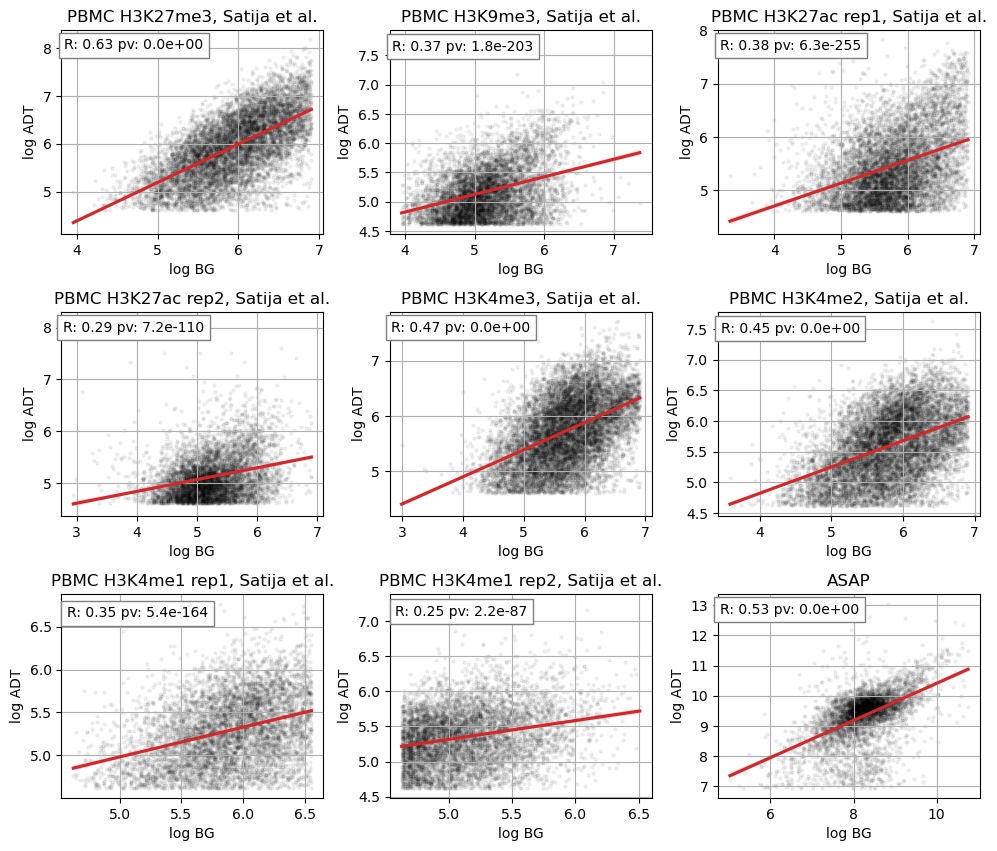

In [41]:
from scipy import stats

plt.figure(figsize=(10, 11))
ax = None

for nplot, sample in enumerate(list(samples_dict.keys()),1):
    
    sampleID = sample
    
    try:
        samples = load(open("/scratch2/shared/CUTAG/data/samples.yml"), Loader)[sampleID]
    except KeyError:
        raise Exception(f'ERROR: {sampleID} not in sample YAML file')

    dpath = os.path.join('/scratch2/shared/CUTAG/data/', samples["modality"])

    genomic_sample = os.path.join(dpath, sampleID)


    adt_sampleID   = samples['ADT']
    adt_sample     = os.path.join(dpath, adt_sampleID)
    outdir         = "/scratch2/shared/CUTAG/resultstry/"+sampleID
    
    regress_count  = "bg"
    feature_type   = "merged_as_satija"
    n_neighbors    = 1
    
    seed           = None
    
    min_cells      = samples['optimal params']['min_cells']
    min_genes      = samples['optimal params']['min_genes']
    max_genes      = samples['optimal params']['max_genes']
    min_counts     = samples['optimal params']['min_counts']
    max_counts     = samples['optimal params']['max_counts']
    
    min_genes_adt  = samples['optimal params']['min_genes_adt']
    min_counts_adt = samples['optimal params']['min_counts_adt']
    max_counts_adt = samples['optimal params']['max_counts_adt']
    
    if samples["modality"]=="ASAP":
        
        genomic_sample = '/scratch2/shared/CUTAG/data/ASAP/GSM4732109'

        adata = load_cellranger(genomic_sample, feature_type=feature_type, 
                                      dtype=float)

        adt_sample = '/scratch2/shared/CUTAG/data/ASAP/GSM4732110'
        adts_file = os.path.join(adt_sample, "ADTs", "ADT_matrix.tsv")

        df_adts = pd.read_csv(adts_file, sep=' ')
        df_adts=df_adts.set_index("barcode")

        adts = ad.AnnData(X=df_adts.to_numpy().T, obs=df_adts.columns.tolist(), var=df_adts.index.tolist(), dtype='float64')
        adts.var_names = df_adts.index.tolist()
        adts.obs_names = df_adts.columns.tolist()

        del(adts.obs[0])
        del(adts.var[0])

        adata = adata[adata.obs_names.isin(adts.obs_names)]

        sc.pp.filter_cells(adata, min_counts = 0)

        adata.obs["genomic_counts"] = adata.obs["n_counts"]

        sc.pp.filter_cells(adts, min_counts = 0)

        adts.obs["adt_counts"] = adts.obs["n_counts"]
                
        process_line = lambda barcode, bg_count: (barcode, int(bg_count)) 
        bgpath = os.path.join(genomic_sample, "outs", "mapped_read_per_barcode.txt")
        bg_dict = dict(process_line(*l.split()) for l in open(bgpath, "r"))

        combined_df = pd.merge(adata.obs, adts.obs, how='inner', left_index=True, right_index=True)
        
        combined_df["bg_counts"] = combined_df.index.map(bg_dict)

        x = np.log1p(combined_df["adt_counts"])
        y = np.log1p(combined_df["genomic_counts"])    
    
    else:
        if samples["modality"] == "CITE":
            max_mito = samples['optimal params']['max_mito']
            min_n_genes = samples['optimal params']['min_n_genes']
            max_n_genes = samples['optimal params']['max_n_genes']    


        print(f"Processing {sampleID}")

        # Load data
        ### remove windows with less than five counts and then merge adjacent windows
        print(f" - Loading Genomic library")

        if samples["modality"] == "CITE":
            adata = sc.read(os.path.join(genomic_sample, "CITE_rna.h5ad"))
        else:
            adata = load_cellranger(genomic_sample, feature_type=feature_type, 
                                  dtype=float)


        adata.obs["total_genomic"] = np.array(adata.X.sum(axis=1)).flatten()

        # Filter bins in few cells
        print(f" - Filter genomic features in few cells")
        ###########################################################################
        # Filter Histones


        # Cell barcodes with <1000 or >60000 UMIs
        if min_counts:
            sc.pp.filter_cells(adata, min_counts=min_counts)

        if max_counts:
            sc.pp.filter_cells(adata, max_counts=max_counts)

        # # <50 or >700 genes detected
        if min_genes:
            sc.pp.filter_cells(adata, min_genes=min_genes)

        if max_genes:
            sc.pp.filter_cells(adata, max_genes=max_genes)

        # removing genes expressed in fewer than 3 cells
        if min_cells:
            sc.pp.filter_genes(adata, min_cells=min_cells)

        if samples["modality"] == "CITE":

            adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
            sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
            adata = adata[adata.obs.pct_counts_mt < max_mito, :]
            adata = adata[adata.obs.n_genes_by_counts > min_n_genes, :]
            adata = adata[adata.obs.n_genes_by_counts < max_n_genes, :]

        ###########################################################################
        # Merge ADTS
        print(f" - Loading ADTs")
        print(os.path.join(adt_sample, "ADTs", "ADT_matrix.tsv"))
        adts_file = os.path.join(adt_sample, "ADTs", "ADT_matrix.tsv")
        # TODO: what is this?
        if sampleID.startswith("GSM"):
            ad_adts = load_ADTs(adts_file, adata, modality= samples["modality"], transpose=True)
        else:
            ad_adts = load_ADTs(adts_file, adata, modality= samples["modality"])

        ###########################################################################
        # Filter ADTs
        print(f" - Filter ADTs with few counts")
        if samples["modality"] != "ASAP":
            if min_genes_adt:
                sc.pp.filter_cells(ad_adts, min_genes=min_genes_adt)

            if min_counts_adt:
                sc.pp.filter_cells(ad_adts, min_counts=min_counts_adt)
                sc.pp.filter_genes(ad_adts, min_counts=min_counts_adt)  # we want to make sure there is at least few counts for a given ADT


            if max_counts_adt:
                sc.pp.filter_cells(ad_adts, max_counts=max_counts_adt)

            # WARNING: highly specific to Satija dataset:
            if samples["lab"]=="Satija":
                ad_adts.obs.index = [f"{v[:-2]}-1" for v in ad_adts.obs.index]

        ###########################################################################
        # Merge ADT with genomic library
        merged_df = pd.merge(ad_adts.obs, adata.obs, how="inner",
                               left_index=True, right_index=True)
        
        ###########################################################################
        # Normalize each cell ADT count by the genomic-library background
        if regress_count != "no":
            if regress_count == "bg":
                if samples["modality"] == "CITE":
                    merged_df["bg_counts"] = merged_df["total_counts"]
                else:
                    process_line = lambda barcode, bg_count: (barcode, int(bg_count)) 
                    bgpath = os.path.join(genomic_sample, "outs", "mapped_read_per_barcode.txt")
                    bg_dict = dict(process_line(*l.split()) for l in open(bgpath, "r"))
                    merged_df["bg_counts"] = merged_df.index.map(bg_dict)
            elif regress_count == "total":
                merged_df["bg_counts"] = merged_df["total_genomic"]
            else:
                raise NotImplementedError(
                    f"ERROR: regression {regress_count} not implemented")
            print(f" - Normalize ADTs by genomic background")
            # Load the data
            ad_adts=ad_adts[ad_adts.obs_names.isin(merged_df.index.tolist())]
            x = np.log1p(np.sum(ad_adts.X, axis=1))
            y = np.log1p(merged_df["total_genomic"])
    
    ax = plt.subplot(4, 3, nplot)
    sns.regplot(x=x, y=y, scatter_kws={'s': 5, 'color': 'k', 'alpha': 0.05}, color='tab:red')
    r, pv = stats.pearsonr(x, y)
    i = plt.xlim()[0]
    j = plt.ylim()[1]
    t = plt.text(i * 1.01, j * 0.98, f'R: {r:.2f} pv: {pv:.1e}', va='top')
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='tab:grey'))
    plt.xlabel('log BG')
    plt.ylabel('log ADT')
    plt.grid()
    plt.title(samples_dict[sample])

# Show the plot
plt.tight_layout()
plt.savefig("sup1.png", dpi=500)
plt.show()

### Supplementary Figure 3

GSM5849215
GSM5849212
GSM5849221
GSM5849224
GSM5849206
GSM5849209
GSM5849218
GSM5849227


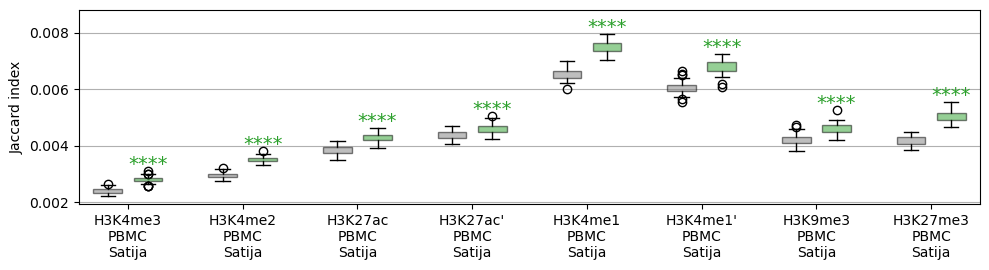

In [43]:
samples = load(open("/scratch2/shared/CUTAG/data/samples.yml"), Loader)

def get_results(sampleID, results_path):
    rpath = os.path.join(results_path, sampleID) # bsc symp was results4
    results = {}
    prev_vals = set()  # some combination of parameters yield the exact same clustering
    failed=list()
    for rep in os.listdir(rpath):
        key = tuple(rep.split('_'))
        dpath = os.path.join(rpath, rep)
        sampleID = key[1]
        leiden = int(key[0][6:])

        results[key] = {}
        results[key]['path']        = dpath
        results[key]['sampleID']    = sampleID
        results[key]['min_genes']   = int(key[3][9:])
        results[key]['max_genes']   = int(key[4][9:])
        results[key]['min_counts']  = int(key[5][10:])
        results[key]['max_counts']  = int(key[6][10:])
        #results[key]['rm_pca']      = int(key[7][3:])
        results[key]['n_pcs']       = int(key[8][4:])
        results[key]['n_neighbors'] = float(key[9][6:])
        results[key]['regress']     = key[10][8:]
        
        # general stats
        try:
            for line in open(os.path.join(dpath, f'{sampleID}_stats.tsv')):
                try:
                    k, v = line.strip().split('\t')
                    results[key][k] = float(v)
                except ValueError:
                    k, *v = line.strip().split('\t')
                    results[key][k] = [float(i) for i in v]
        except FileNotFoundError:
            del results[key]
            continue
        results[key]['RAGI HK'] = results[key]['RAGI housekeeping genes']
        results[key]['RAGI marker'] = results[key]['RAGI ratio'] * results[key]['RAGI HK']

    filtered_keys = [key for key in results.keys() if "RAGI ratio" in results[key]]
    results = {key: results[key] for key in filtered_keys}
    
    return results

#rdir = '/scratch2/shared/CUTAG/results21'

samples.keys()

del samples['621']
del samples['946']
del samples['1019']
del samples['GSM4732109']
del samples['GSM5008737']
del samples['GSM5008740']

# Create a list of keys in the desired order
key_order = ['GSM5849215', 'GSM5849212', 'GSM5849221', 'GSM5849224', 'GSM5849206', 'GSM5849209', 'GSM5849218', 'GSM5849227']

# Create a new OrderedDict with the keys in the desired order
samples = OrderedDict((key, samples[key]) for key in key_order)

results = {}
for s_key,s_vals in samples.items():
    print(s_key)
    s_name = f"{s_vals['mark']}-rep{s_vals['replicate']}_{s_vals['tissue']}_{s_vals['lab']}"
    try:
        results[s_key] = get_results(s_key, rdir)
        results[s_key]['name'] = s_name
    except FileNotFoundError:
        print('  -> MISSING')

#stats = ['RAGI HK', 'RAGI marker', 'RAGI ratio', 'VMS', 'ARI', 'JAC1', 'JAC2']
stats = ['JAC1']

plt.figure(figsize=(10, 7/2.5))

for nstat, stat in enumerate(stats, 1):
    plt.subplot(len(stats), 1, nstat)
    plt.ylabel("Jaccard index")
    bgs = []
    nos = []
    max_pos = []
    min_pos = []
    texts = []
    for pos, (s_key, s_vals) in enumerate(results.items()):
        
        no = [s_vals[k][stat] for k in s_vals
              if k[-2] == 'REGRESS-no' and k[-1].startswith("SEED")][:100]
        try:
            mno = [s_vals[k][stat] for k in s_vals
                   if k[-1] == 'REGRESS-no' and not k[-1].startswith("SEED")][0]
        except:
            mno = float('nan')
        bg = [s_vals[k][stat] for k in s_vals 
              if k[-2] == 'REGRESS-bg'][:100]
        try:
            mbg = [s_vals[k][stat] for k in s_vals
                   if k[-1] == 'REGRESS-bg'][0]
        except:
            mbg = float('nan')
        bgs.append(bg)
        nos.append(no)
        if len(bg) < 100 or len(no) < 100:
            continue
        else:
            r, p = mannwhitneyu(bg, no)
            ps = '*' * min(4, int(-np.log10(p)))
            if p < 0.05:
                maxpos = max(bg + no)
                minpos = min(bg + no)
                max_pos.append(maxpos)
                min_pos.append(minpos)
                if np.median(bg) > np.median(no):
                    texts.append((1 + pos * 2 - 0.15, maxpos, ps, 'tab:green'))
#                     plt.text(1 + pos * 2 - 0.15, mpos, ps, ha='center', size=14, 
#                              color='tab:green', va='top')
                else:
                    texts.append((pos * 2 + 0.15, maxpos, ps, 'tab:red'))
#                     plt.text(pos * 2 + 0.15, mpos, ps, ha='center', size=14, 
#                              color='tab:red', va='top')
#         plt.plot(pos * 2 + 0.15, mno, 'o', color='tab:red')
#         plt.plot(1 + pos * 2 - 0.15, mbg, 'o', color='tab:green')
    plt.boxplot(nos, positions=[i * 2 + 0.15 for i in range(len(nos))], 
                notch=False, bootstrap=1000, patch_artist=True,
                boxprops=dict(facecolor='tab:grey', alpha=0.5), medianprops=dict(color='grey', linewidth=0))
    plt.boxplot(bgs, positions=[i * 2 + 1 - 0.15 for i in range(len(bgs))], 
                notch=False, bootstrap=1000, patch_artist=True,
                boxprops=dict(facecolor='tab:green', alpha=0.5), medianprops=dict(color='grey', linewidth=0))
    if max_pos:
        diff = max(max_pos) - min(min_pos)
        for x, y, t, c in texts:
            plt.text(x, y + diff * 0.1, t, ha='center', size=14, color=c, va='top')
        plt.ylim(min(min_pos) - diff * 0.05, max(max_pos) + diff * 0.15)
    plt.grid(axis='y')
    plt.xticks([v + 0.5 for v in range(0, len(bgs) * 2, 2)], 
               [f"{k['name']}".replace('_', '\n').replace('-rep1', '').replace('-rep2', "'") for k in results.values()])


plt.tight_layout()        
plt.savefig("sup3.png", dpi=500)
plt.show()